In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
import graphviz

In [2]:
data = pd.read_csv

In [53]:
data = pd.read_csv('data.csv')

In [54]:
dicta = {'f':1, 'tr':2,'tl':3, 'b':4}

In [55]:
data

,left,right,dist,cont
0,False,False,24.01,f
1,False,False,20.89,f
2,False,False,19.93,tr
3,False,False,19.93,tr
4,False,False,79.06,tr
...,...,...,...,...
750,False,False,49.27,f
751,False,False,45.30,f
752,False,False,45.94,f
753,False,False,42.52,f


In [6]:
data['cont'] = data.cont.map(lambda x : dicta[x] if x else dicta[x])

In [56]:
data['dist'] = data.dist.map(lambda x:None if x>200 else x)

In [8]:
data['left']  =data.left.map(lambda x: 1 if x else 0)
data['right'] = data.right.map(lambda x: 1 if x else 0)

In [57]:
data = data.dropna()

In [58]:
data

,left,right,dist,cont
0,False,False,24.01,f
1,False,False,20.89,f
2,False,False,19.93,tr
3,False,False,19.93,tr
4,False,False,79.06,tr
...,...,...,...,...
750,False,False,49.27,f
751,False,False,45.30,f
752,False,False,45.94,f
753,False,False,42.52,f


In [59]:
aa = data.values

In [60]:
aa

array([[False, False, 24.01, 'f'],
       [False, False, 20.89, 'f'],
       [False, False, 19.93, 'tr'],
       ...,
       [False, False, 45.94, 'f'],
       [False, False, 42.52, 'f'],
       [False, False, 40.81, 'f']], dtype=object)

In [61]:
np.random.shuffle(aa)

In [62]:
aa

array([[True, False, 33.88, 'tr'],
       [True, False, 145.66, 'tr'],
       [True, False, 134.38, 'tr'],
       ...,
       [True, False, 28.06, 'tr'],
       [False, False, 88.39, 'f'],
       [True, False, 135.69, 'tr']], dtype=object)

In [63]:
y = aa[:, -1]
x = aa[:, :-1]

In [64]:
y

array(['tr', 'tr', 'tr', 'tr', 'f', 'tr', 'tr', 'tl', 'tr', 'f', 'tr',
       'tr', 'tr', 'f', 'f', 'f', 'tr', 'f', 'tr', 'tr', 'f', 'f', 'tr',
       'tr', 'tr', 'f', 'tr', 'tr', 'tr', 'tr', 'f', 'tr', 'f', 'tr',
       'tr', 'tr', 'f', 'tr', 'f', 'tr', 'f', 'tr', 'tr', 'tr', 'tr',
       'tr', 'tr', 'f', 'f', 'tr', 'tr', 'f', 'f', 'tr', 'tr', 'tl', 'tr',
       'f', 'tr', 'f', 'f', 'tr', 'f', 'tr', 'f', 'tr', 'f', 'f', 'tr',
       'tr', 'tr', 'tr', 'tr', 'f', 'f', 'tr', 'f', 'f', 'tr', 'b', 'tr',
       'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'f',
       'tr', 'tr', 'tr', 'f', 'f', 'tr', 'tr', 'tr', 'tr', 'f', 'f', 'f',
       'f', 'tr', 'tr', 'tr', 'tr', 'tr', 'f', 'tr', 'tr', 'tr', 'tr',
       'f', 'f', 'tr', 'f', 'f', 'f', 'tr', 'tr', 'tr', 'tr', 'tr', 'f',
       'f', 'f', 'tr', 'tr', 'tr', 'tr', 'tr', 'f', 'f', 'f', 'tr', 'f',
       'f', 'tr', 'tr', 'tr', 'tl', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr',
       'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'f', 'f', 'tr', '

In [65]:
y.dtype

dtype('O')

In [66]:
x, y

(array([[True, False, 33.88],
        [True, False, 145.66],
        [True, False, 134.38],
        ...,
        [True, False, 28.06],
        [False, False, 88.39],
        [True, False, 135.69]], dtype=object),
 array(['tr', 'tr', 'tr', 'tr', 'f', 'tr', 'tr', 'tl', 'tr', 'f', 'tr',
        'tr', 'tr', 'f', 'f', 'f', 'tr', 'f', 'tr', 'tr', 'f', 'f', 'tr',
        'tr', 'tr', 'f', 'tr', 'tr', 'tr', 'tr', 'f', 'tr', 'f', 'tr',
        'tr', 'tr', 'f', 'tr', 'f', 'tr', 'f', 'tr', 'tr', 'tr', 'tr',
        'tr', 'tr', 'f', 'f', 'tr', 'tr', 'f', 'f', 'tr', 'tr', 'tl', 'tr',
        'f', 'tr', 'f', 'f', 'tr', 'f', 'tr', 'f', 'tr', 'f', 'f', 'tr',
        'tr', 'tr', 'tr', 'tr', 'f', 'f', 'tr', 'f', 'f', 'tr', 'b', 'tr',
        'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'f',
        'tr', 'tr', 'tr', 'f', 'f', 'tr', 'tr', 'tr', 'tr', 'f', 'f', 'f',
        'f', 'tr', 'tr', 'tr', 'tr', 'tr', 'f', 'tr', 'tr', 'tr', 'tr',
        'f', 'f', 'tr', 'f', 'f', 'f', 'tr', 'tr', 'tr'

In [67]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x, y)

In [68]:
yfit = clf.predict(x)

In [69]:
np.sum(yfit != y)

41

In [70]:
np.unique(y)

array(['b', 'f', 'tl', 'tr'], dtype=object)

[Text(197.83636363636364, 190.26, 'X[0] <= 0.5\ngini = 0.49\nsamples = 716\nvalue = [246, 448, 20, 2]'),
 Text(121.74545454545455, 135.9, 'X[2] <= 20.32\ngini = 0.528\nsamples = 437\nvalue = [246, 171, 20, 0]'),
 Text(60.872727272727275, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.069\nsamples = 139\nvalue = [0, 134, 5, 0]'),
 Text(30.436363636363637, 27.180000000000007, 'gini = 0.0\nsamples = 130\nvalue = [0, 130, 0, 0]'),
 Text(91.30909090909091, 27.180000000000007, 'gini = 0.494\nsamples = 9\nvalue = [0, 4, 5, 0]'),
 Text(182.61818181818182, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.301\nsamples = 298\nvalue = [246, 37, 15, 0]'),
 Text(152.1818181818182, 27.180000000000007, 'gini = 0.223\nsamples = 282\nvalue = [246, 36, 0, 0]'),
 Text(213.05454545454546, 27.180000000000007, 'gini = 0.117\nsamples = 16\nvalue = [0, 1, 15, 0]'),
 Text(273.92727272727274, 135.9, 'X[1] <= 0.5\ngini = 0.014\nsamples = 279\nvalue = [0, 277, 0, 2]'),
 Text(243.4909090909091, 81.53999999999999, 'gini = 0.0\n

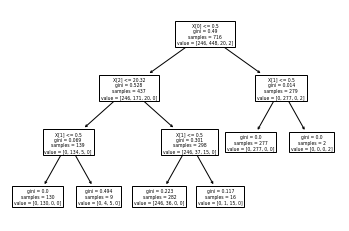

In [32]:
tree.plot_tree(clf)

In [33]:
yfit = clf.predict(x)

In [34]:
np.sum(yfit != y)

41

In [35]:
aa = np.array([[0, 0, 10]])

In [36]:
clf.predict(aa)

array([2.])

In [37]:
clf.predict(np.array([[1, 0, 20]]))

array([2.])

In [38]:
clf.predict(np.array([[False, True, 10]]))

array([3.])

In [39]:
clf.predict(np.array([[True, False, 20]]))

array([2.])

In [40]:
data.columns

Index(['left', 'right', 'dist', 'cont'], dtype='object')

In [52]:
data.columns[-1]

'cont'

In [71]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=data.columns[:-1],  
                     class_names=np.unique(y),  
                     filled=True, rounded=True,  
                     special_characters=True)  

In [72]:
graph = graphviz.Source(dot_data)

In [73]:
graph.render('test')

'test.pdf'

In [76]:
from sklearn.tree import export_text

In [77]:
bbb = data.columns[:-1].values

In [78]:
bbb[1]

'right'

In [79]:
clf

DecisionTreeClassifier(max_depth=3)

In [80]:
from sklearn.datasets import load_iris

In [81]:
iris = load_iris()

In [82]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [83]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [84]:
r = export_text(clf, feature_names=list(bbb))

In [85]:
r

'|--- left <= 0.50\n|   |--- dist <= 20.32\n|   |   |--- right <= 0.50\n|   |   |   |--- class: tr\n|   |   |--- right >  0.50\n|   |   |   |--- class: tl\n|   |--- dist >  20.32\n|   |   |--- right <= 0.50\n|   |   |   |--- class: f\n|   |   |--- right >  0.50\n|   |   |   |--- class: tl\n|--- left >  0.50\n|   |--- right <= 0.50\n|   |   |--- class: tr\n|   |--- right >  0.50\n|   |   |--- class: b\n'